## This notebook is a tutorial for running the MCMC algorithm with different conditions

think of this as a model for what you would run in your python environment to get results

In [1]:
import numpy as np
import pandas as pd

# import main data
data_lcparam = pd.read_csv("lcparam_DS17f.txt", sep=" ")

#these are the core functions: 
#chain gives us results
#plot_chain_behaviour shows the results
from core_mcmc_functions import chain
from core_mcmc_functions import plot_chain_behaviour

In [2]:
#this is not necesarry to import unless you want do systematic error

# import systematic error
data_sys = pd.read_csv("sys_DS17f.txt", sep=" ")
data_sys.columns = ["sys_error"]
sys_error_data = np.reshape(pd.Series.to_numpy(data_sys.sys_error), (40, 40))

#create a likelihood function that uses the systematic error
from prior_likelihood import log_likelihood

def sys_error_likelihood(params, data):
    return log_likelihood(params, data, sys_error=sys_error_data)

## How to run the chain function

In [3]:
# here is an example chain, it will run for 4,000 steps at maximum and terminate if the mean of the parameters
# over the previous 1,500 steps is within .5% of the mean of the 1,500 steps before that.

# 'convergence' is very tunable here. A 'convergence failure' doesn't mean the algorithm failed so much as
# you set number of trials too low or an unreasonable convergence threshhold/window.

#we dont use an adaptive variance, so convergence can be slow when you start far from the minima, this is a "fast start state"
fss = [.33, .6, 74, -19.23]
# though, we still get there eventually if we start far away from the minima, this is a "slow start state"
sss = [.96,.2,20,-19.23]

chn, rej, convergence = chain(data_lcparam, 4000, 1500, .005, start_state=sss, gen_variances=None, prior_mode='uniform')

#systematic error chain would look like this
    # I dont suggest trying a  really slow start state (all parameters very far from expected answers) on this one,
    # because it is already quite a bit slower to use the systematic error
    # due to the increased complexity of the matrix algebra when finding the likelihood. 
    # However, it will converge if you run it long enough.

#chn, rej, convergence = chain(data_lcparam, 5000, 1000, .01, start_state=[.33, .6, 74, -17], gen_variances='systematic', prior_mode='M_gaussian', likelihood_func=sys_error_likelihood )



convergence failed. converged parameters: [False  True  True  True]


## Once you have a chain, you can plot the results using this function:
    it has lots of options, detailed in the docstring

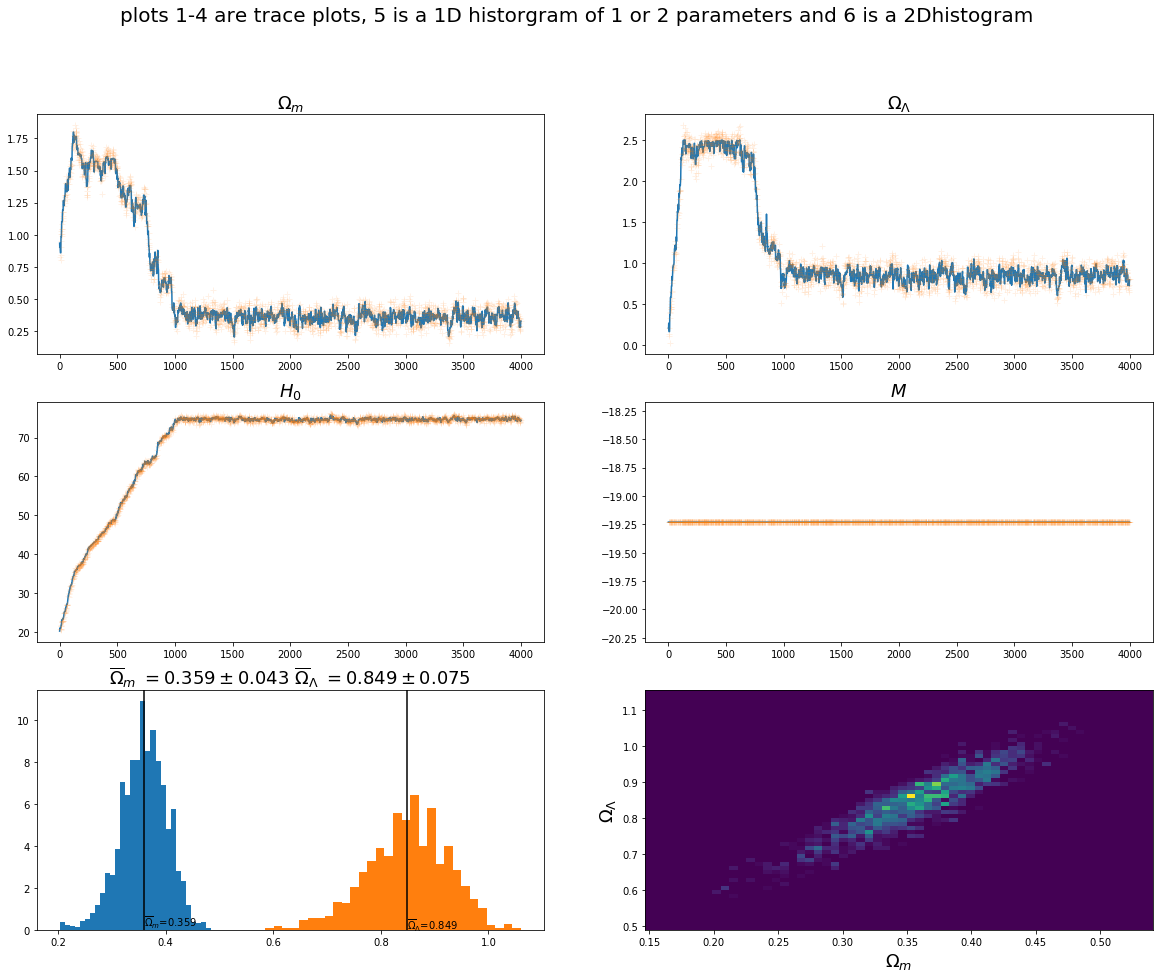

In [4]:
plot_chain_behaviour(chn, rej, two_d_bins =60)

## Likelihood Test Plot

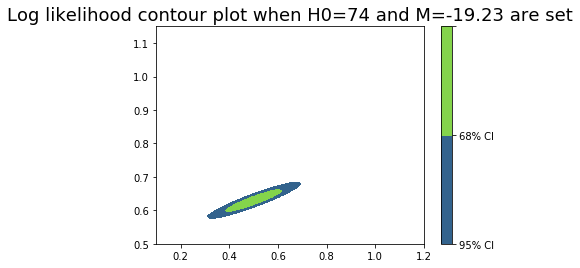

In [6]:
from test_function import log_likelihood_test_contour_plot

# this 'test' shows plots of the likelihood by using a brute force parameter sweep in 2 dimensions. No assert
# in this test, as this kind of test doesnt lends itself to an assert statement.
# The only required argument is how fine of a grid we want to test over. bigger = more test points, scales as N^2

log_likelihood_test_contour_plot()